<a href="https://colab.research.google.com/github/SLCFLAB/Math4DS/blob/main/ch08-regression%2Cridge%2Classo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Regression

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

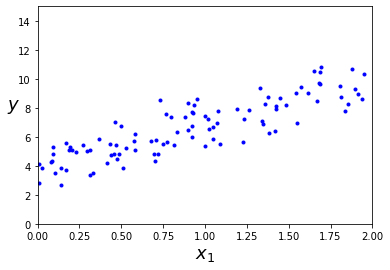

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [5]:
lin_reg.intercept_, lin_reg.coef_

(array([3.88790513]), array([[2.99206759]]))

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
lin_reg.score(X,y) #R sqaure

0.7445311620379271

In [9]:
def adjust_R2(model,X,y):
    return (1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

In [10]:
adjust_R2(lin_reg,X,y) #adust R square

0.7419243371607631

## prediction

In [11]:
X_new = np.array([[0], [2]])


In [12]:
X_new

array([[0],
       [2]])

In [13]:
y_predict = lin_reg.predict(X_new)


In [14]:
y_predict

array([[3.88790513],
       [9.8720403 ]])

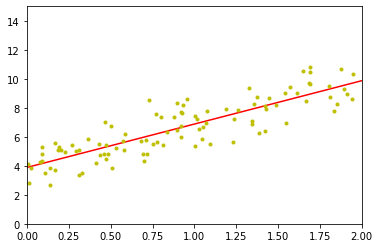

In [15]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.show()

## Lasso

In [16]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [17]:
y_predict_lasso = lasso_reg.predict(X_new)

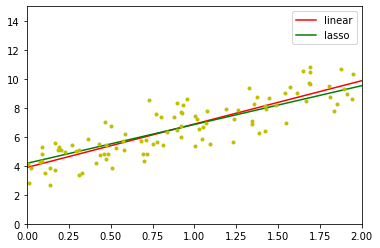

In [18]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()


## Ridge

In [19]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
y_predict_ridge = ridge_reg.predict(X_new)

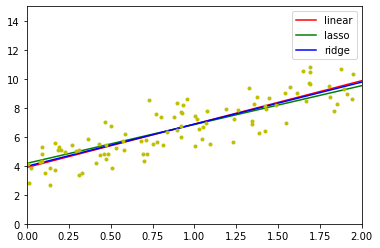

In [20]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X_new, y_predict_ridge, "b-", label="ridge")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()



# Multi

### lasso

In [23]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes

In [ ]:
load_diabetes(as_frame=True)

In [25]:
X,y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']

In [26]:
load_diabetes()['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [27]:
pd.DataFrame(load_diabetes()['data'],columns=load_diabetes()['feature_names'])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


In [38]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [ ]:
search.fit(X_train,y_train)


In [40]:
coefficients = search.best_estimator_.named_steps['model'].coef_
print(coefficients) # coeff가 0이 된 것이 3개가 있음을 볼 수 있음.

[  0.15096441  -9.00511695  26.90181607  18.04877039  -5.41870204
  -0.         -12.27908758   0.          19.4892079    0.        ]


### linear regression을 그냥 그려보면 coefficient가 사라진 변수가 없음

In [33]:
pipeline2 = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',LinearRegression())
])



In [34]:
pipeline2.fit(X_train,y_train)
coefficients2 = pipeline2['model'].coef_
print(coefficients2)


[  1.48308212 -11.55187312  26.6268292   19.59539638 -34.2702909
  18.83607682   0.49564744   8.19146562  29.91141711  -1.01089504]
